In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotnine as pn
import seaborn as sns 
import torch

import utils
from sklearn.metrics.pairwise import cosine_similarity, paired_distances
from scipy.spatial import distance


In [20]:
import importlib
importlib.reload(utils)


<module 'utils' from '/home/acercyc/projects/Keio Testing_analysis/src/utils.py'>

In [69]:
# subj = utils.ExpInfo.getSubjIDs()[1]
subj = 'K-Reg-H-7'
task = utils.ExpInfo.taskName[1]


In [70]:
# xhy = utils.LoadData.xhy(subj, task)
# xhy_disp = utils.LoadData.xhy_disp(subj, task)
d = utils.LoadData.mouseMovement_array(subj, task, velocity=True)
df_beh = utils.LoadData.behaviorData(subj, task) 

In [86]:
iTrial = 8
wSize = 20
dist_measure = 'euclidean'


target = df_beh.loc[iTrial, 'target dot']
choice = df_beh.loc[iTrial, 'selected dot']




Target dot: 3
Selected dot: 3


Text(0.5, 1.0, 'average cosine_similarity')

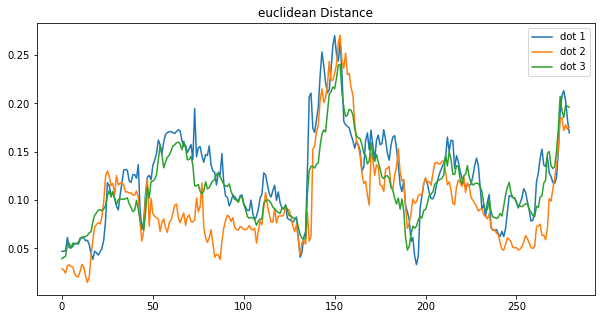

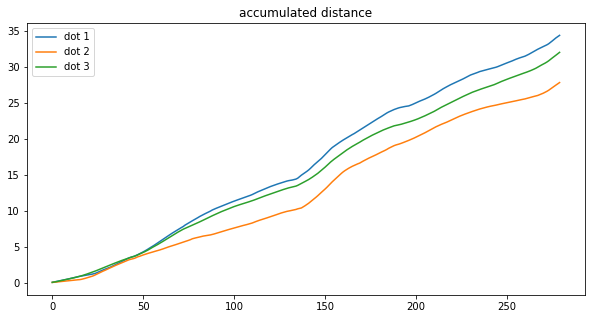

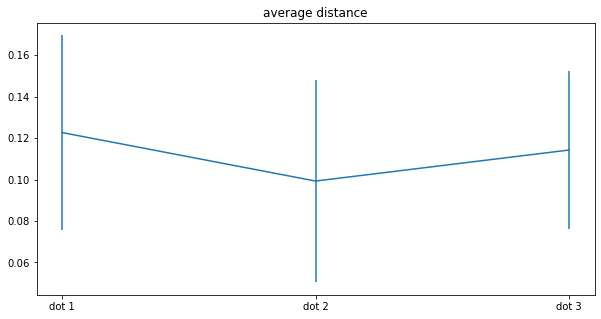

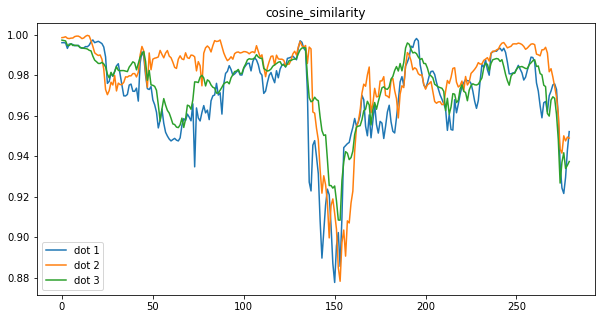

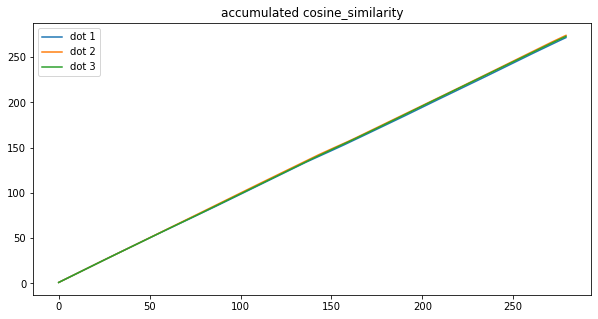

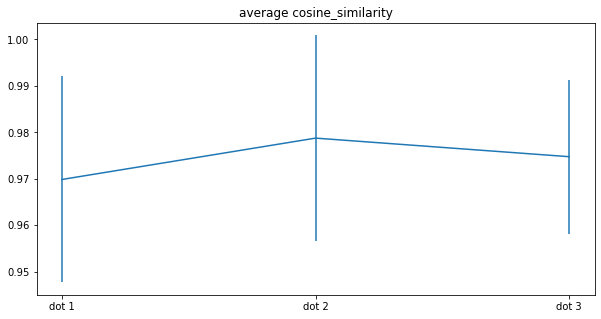

In [87]:
# ---------------------------------------------------------------------------- #
#                                compute forward                               #
# ---------------------------------------------------------------------------- #
x = d[0][iTrial]
x = utils.DataProcessing.rollingWindow(x, wSize, 1)
h, y = utils.test.quick_forward(subj, x)

h_disp = []
for i in range(3):
    x_disp = d[1][iTrial][:, i*2:i*2+2]
    x_disp = utils.DataProcessing.rollingWindow(x_disp, wSize, 1)
    h_disp_, y_disp = utils.test.quick_forward(subj, x_disp)
    h_disp.append(h_disp_)


# ---------------------------------------------------------------------------- #
#                                   distance                                   #
# ---------------------------------------------------------------------------- #
dist_cos = []
dist = []
for iDot in range(3):
    h1 = h
    h2 = h_disp[iDot]
    dist_cos_ = cosine_similarity(h1, h2).diagonal()
    dist_ = paired_distances(h1, h2, metric=dist_measure)
    dist_cos.append(dist_cos_)
    dist.append(dist_)
    
dist = np.vstack(dist).T
dist_cos = np.vstack(dist_cos).T

# ---------------------------------------------------------------------------- #
#                                     plot                                     #
# ---------------------------------------------------------------------------- #
print(f'Target dot: {target}')
print(f'Selected dot: {choice}')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist)
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title(f'{dist_measure} Distance')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist.cumsum(axis=0))
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title('accumulated distance')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.errorbar(['dot 1', 'dot 2', 'dot 3'],  dist.mean(axis=0), yerr=dist.std(axis=0))
ax.set_title('average distance')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist_cos)
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title('cosine_similarity')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist_cos.cumsum(axis=0))
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title('accumulated cosine_similarity')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.errorbar(['dot 1', 'dot 2', 'dot 3'],  dist_cos.mean(axis=0), yerr=dist_cos.std(axis=0))
ax.set_title('average cosine_similarity')


Text(0.5, 1.0, 'target')

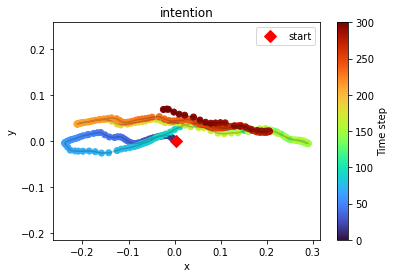

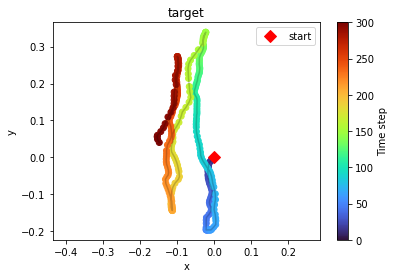

In [88]:
xy = d[0][iTrial].cumsum(axis=0)
utils.Plot.traj_withColour(xy[:, 0], xy[:, 1])
plt.title('intention')

i = target-1
xy = d[1][iTrial][:, i*2:i*2+2].cumsum(axis=0)
utils.Plot.traj_withColour(xy[:, 0], xy[:, 1])
plt.title('target')

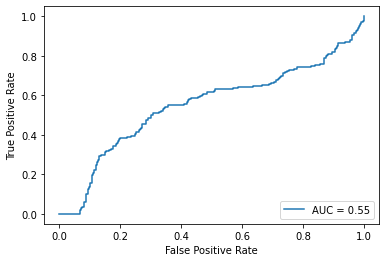

In [22]:
from sklearn import metrics 

y_true = np.zeros(dist.shape)
y_true[:, 1] = 1
fpr, tpr, thresholds = metrics.roc_curve(y_true.flatten(), 1-dist.flatten())
roc_auc = metrics.auc(fpr, tpr)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

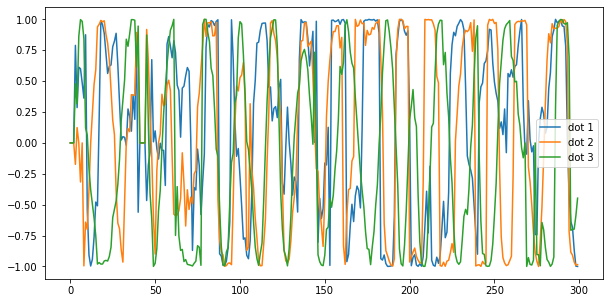

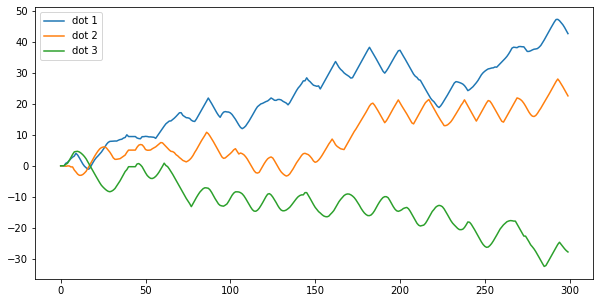

In [23]:
d1 = d[0][iTrial]
dist = []
for i in range(3):
    d2 = d[1][iTrial][:, i*2:i*2+2]
    dist_ = cosine_similarity(d1, d2).diagonal()
    # dist_ = paired_distances(d1, d2, metric=dist_measure)
    dist.append(dist_)
dist = np.vstack(dist).T

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist)
ax.legend(['dot 1', 'dot 2', 'dot 3'])

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist.cumsum(axis=0))
ax.legend(['dot 1', 'dot 2', 'dot 3'])
